In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200, precision=5)

In [2]:
file_name = "iris_data.txt"
df = pd.read_csv(file_name, sep="\t", header=0)
num_data_points = 150
num_bins = 10
num_classes = 3
attributes = ["PW", "PL", "SW","SL"]

In [3]:
""" Part 1: calculate all joint prob dists """
attribute_delta = {a: (df[a].max() - df[a].min())/num_bins for a in attributes}
attribute_bins = {a:[ ( df[a].min()+(i-1)*attribute_delta[a] , df[a].min()+(i)*attribute_delta[a] )
                    for i in range(1, num_bins +1)] for a in attributes}
joint_prob_dists = {a:np.full( shape=(num_classes, num_bins), fill_value= 0) for a in attributes}

for a in attributes:
    for i in range(num_data_points):
        att_val = df.loc[i,a]
        class_label = df.loc[i,'FlowerClass']
        
        for (col_ind, bin) in enumerate(attribute_bins[a]):
            min_val, max_val = bin
            if min_val <= att_val < max_val: 
                row_ind = int(class_label) - 1
                joint_prob_dists[a][row_ind][col_ind] += 1
            if col_ind + 1 == num_bins: # special case for bast bin
                if att_val == max_val:
                    row_ind = int(class_label) - 1
                    joint_prob_dists[a][row_ind][col_ind] += 1
                    
    joint_prob_dists[a] = joint_prob_dists[a]/num_data_points
    
    
for k,v in joint_prob_dists.items():
    print(f"{k} joint Prob Distribution:\n{v}\n\n")

PW joint Prob Distribution:
[[0.24667 0.08667 0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.02    0.05333 0.16667 0.09333 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.00667 0.1     0.12    0.07333 0.03333]]


PL joint Prob Distribution:
[[0.27333 0.05333 0.00667 0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.04667 0.05333 0.2     0.02667 0.00667 0.      0.     ]
 [0.      0.      0.      0.      0.      0.02    0.01333 0.14667 0.06    0.09333]]


SW joint Prob Distribution:
[[0.06    0.12667 0.08    0.06    0.00667 0.      0.      0.      0.      0.     ]
 [0.      0.02    0.01333 0.10667 0.06    0.07333 0.04667 0.01333 0.      0.     ]
 [0.      0.00667 0.      0.01333 0.04    0.1     0.07333 0.02667 0.03333 0.04   ]]


SL joint Prob Distribution:
[[0.      0.00667 0.      0.00667 0.06667 0.10667 0.06    0.06    0.01333 0.01333]
 [0.02    0.04    0.08    0.08667 0.07333 0.03333

In [4]:
""" Working with SW since my number is 5 """
sw_joint_prob_dist = joint_prob_dists['SW']
sw_bins = attribute_bins["SW"]
# print(sw_joint_prob_dist)


In [5]:
""" Class a priori probs """
# sum across all bins (columns, axis = 1)
class_a_priori_probs = np.sum(sw_joint_prob_dist, axis=1) 
class_a_priori_probs = class_a_priori_probs.reshape(-1, 1)
print(f"P(C_1) = {class_a_priori_probs[0]}")
print(f"P(C_2) = {class_a_priori_probs[1]}")
print(f"P(C_3) = {class_a_priori_probs[2]}")

P(C_1) = [0.33333]
P(C_2) = [0.33333]
P(C_3) = [0.33333]


In [6]:
""" Conditional probs """
conditional_probs = sw_joint_prob_dist/class_a_priori_probs
print(f"P(r_i/C_1): {conditional_probs[0]}")
print(f"P(r_i/C_2): {conditional_probs[1]}")
print(f"P(r_i/C_3): {conditional_probs[2]}")

P(r_i/C_1): [0.18 0.38 0.24 0.18 0.02 0.   0.   0.   0.   0.  ]
P(r_i/C_2): [0.   0.06 0.04 0.32 0.18 0.22 0.14 0.04 0.   0.  ]
P(r_i/C_3): [0.   0.02 0.   0.04 0.12 0.3  0.22 0.08 0.1  0.12]


In [7]:
""" Posterior probs for even bins """
bin_probs = np.sum(sw_joint_prob_dist, axis = 0)
posterior_probs = sw_joint_prob_dist/bin_probs
print("Posterior probs for even bins.")
print(f"P(C_i/r_2): {posterior_probs[:,1]}")
print(f"P(C_i/r_4): {posterior_probs[:,3]}")
print(f"P(C_i/r_6): {posterior_probs[:,5]}")
print(f"P(C_i/r_8): {posterior_probs[:,7]}")
print(f"P(C_i/r_10): {posterior_probs[:,9]}")

Posterior probs for even bins.
P(C_i/r_2): [0.82609 0.13043 0.04348]
P(C_i/r_4): [0.33333 0.59259 0.07407]
P(C_i/r_6): [0.      0.42308 0.57692]
P(C_i/r_8): [0.      0.33333 0.66667]
P(C_i/r_10): [0. 0. 1.]


In [8]:
""" Verifying bayes formula """

"""" 
Theoretically: P(C_i, r_i) = P(C_i | r_i)*P(r_i) = P(r_i | C_i)* P(C_i)
thereforeL P(C_i|r_i) = P(r_i|C_i)*P(C_i)/P(r_i)

so for the even bins, I show the above result.
"""

posterior_probs_bayes = conditional_probs * class_a_priori_probs / bin_probs

print("Computed using bayes formula")
print(f"P(C_i/r_2): {posterior_probs_bayes[:,1]}")
print(f"P(C_i/r_4): {posterior_probs_bayes[:,3]}")
print(f"P(C_i/r_6): {posterior_probs_bayes[:,5]}")
print(f"P(C_i/r_8): {posterior_probs_bayes[:,7]}")
print(f"P(C_i/r_10): {posterior_probs_bayes[:,9]}")

print("These are the same as posterior probs computed directly.")
print("Therefore bayes formaul is verified.")

Computed using bayes formula
P(C_i/r_2): [0.82609 0.13043 0.04348]
P(C_i/r_4): [0.33333 0.59259 0.07407]
P(C_i/r_6): [0.      0.42308 0.57692]
P(C_i/r_8): [0.      0.33333 0.66667]
P(C_i/r_10): [0. 0. 1.]
These are the same as posterior probs computed directly.
Therefore bayes formaul is verified.


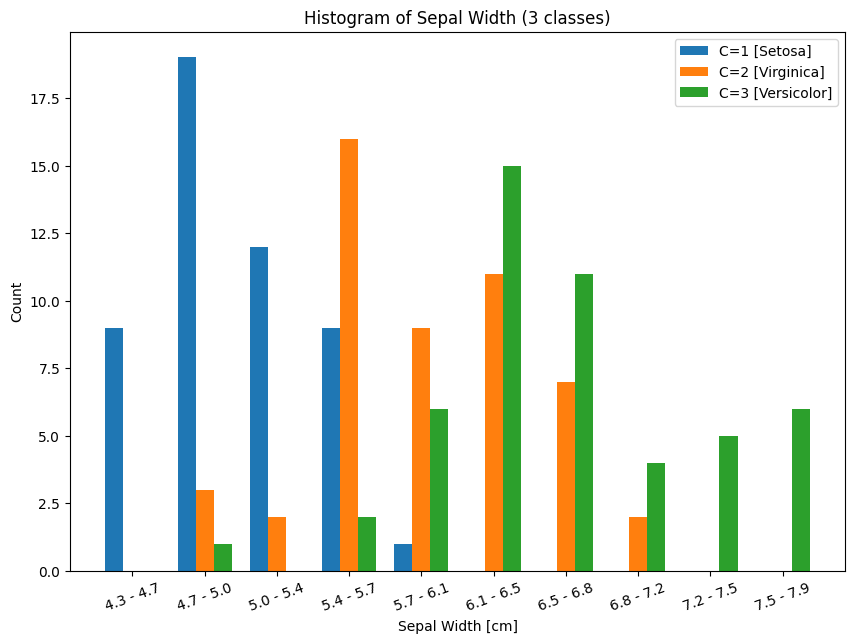

In [9]:
""" histogram """
sw_counts_distribution = sw_joint_prob_dist * num_data_points

# width for grouped bars
bar_width = 0.25
x = np.arange(num_bins)

fig = plt.figure(num = 1, figsize=(10,7))

for i, c in enumerate(range(num_classes)):
    plt.bar(x + i*bar_width, sw_counts_distribution[i], width=bar_width, label=f"C={c}")

plt.xticks(x + bar_width, [f"{sw_bins[i][0]:.1f} - {sw_bins[i][1]:.1f}" 
                           for i in range(num_bins)], rotation = 20)
plt.xlabel("Sepal Width [cm]")
plt.ylabel("Count")
plt.legend(["C=1 [Setosa]","C=2 [Virginica]","C=3 [Versicolor]"])
plt.title("Histogram of Sepal Width (3 classes)")
plt.show()

In [10]:
""" SW Joint Probablity Distribution """
print("SW joint probablity distribution:")
print(sw_joint_prob_dist)

SW joint probablity distribution:
[[0.06    0.12667 0.08    0.06    0.00667 0.      0.      0.      0.      0.     ]
 [0.      0.02    0.01333 0.10667 0.06    0.07333 0.04667 0.01333 0.      0.     ]
 [0.      0.00667 0.      0.01333 0.04    0.1     0.07333 0.02667 0.03333 0.04   ]]


In [11]:
""" P(r_i|C)"""
print(f"P(r_i/C_1): {conditional_probs[0]}")
print(f"P(r_i/C_2): {conditional_probs[1]}")
print(f"P(r_i/C_3): {conditional_probs[2]}")

P(r_i/C_1): [0.18 0.38 0.24 0.18 0.02 0.   0.   0.   0.   0.  ]
P(r_i/C_2): [0.   0.06 0.04 0.32 0.18 0.22 0.14 0.04 0.   0.  ]
P(r_i/C_3): [0.   0.02 0.   0.04 0.12 0.3  0.22 0.08 0.1  0.12]


In [12]:
""" Posterior probs for odd bins """
print("Posterior probs for even bins.")
print(f"P(C_i/r_1): {posterior_probs[:,0]}")
print(f"P(C_i/r_3): {posterior_probs[:,2]}")
print(f"P(C_i/r_5): {posterior_probs[:,4]}")
print(f"P(C_i/r_7): {posterior_probs[:,6]}")
print(f"P(C_i/r_9): {posterior_probs[:,8]}")

Posterior probs for even bins.
P(C_i/r_1): [1. 0. 0.]
P(C_i/r_3): [0.85714 0.14286 0.     ]
P(C_i/r_5): [0.0625 0.5625 0.375 ]
P(C_i/r_7): [0.      0.38889 0.61111]
P(C_i/r_9): [0. 0. 1.]
